In [1]:
# 6. probability

In [2]:
# 6.2

import random

def random_kid():
    return random.choice(["boy","girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    
    older = random_kid()
    if older is "girl":
        older_girl += 1
    if older is "girl" and younger is "girl":
        both_girls += 1
    if older is "girl" or younger is "girl":
        either_girl += 1
    
print("P(2人とも女の子|1人目が女の子):", both_girls / older_girl)
print("P(2人とも女の子|どちらか1人が女の子):", both_girls / either_girl)

P(2人とも女の子|1人目が女の子): 0.5007089325501317
P(2人とも女の子|どちらか1人が女の子): 0.3311897106109325


In [3]:
# 6.3 bayes

# P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)

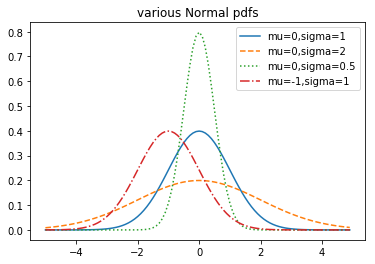

In [4]:
# 6.6

# f(x|μ,σ) = 1/σ√2π * exp(-(x-μ)^2 / 2σ^2)
# μ＝平均、σ＝標準偏差

import matplotlib.pyplot as plt
import math
%matplotlib inline

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1') #μ=0,σ=1の場合、標準正規分布と呼ぶ
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("various Normal pdfs")
plt.show()

# Zが標準正規分布に従う確率変数であった場合、X=σZ+μ
# 確率変数Xは平均μ,標準偏差σの正規分布となる。
# 逆にXが平均μ標準偏差σの正規分布に従う確率変数であるなら、Z=(X-μ)/σ
# 確率変数Zは標準正規分布に従う。

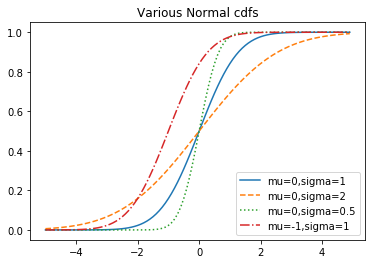

In [5]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs, [normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [7]:
#　特定の確率となる値を見つけるために、normal_cdfの逆関数が必要となる場面がある
#　逆関数を単純に計算する方法はないが、normal_cdfは連続で単調増加であるため二分探索が使える。

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """二分探索を用いて、逆関数の近似値を計算する"""
    
    #　標準正規分布でない場合、標準正規分布からの差分を求める
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 # normal_cdf(-10)は、0（に近い値）である
    hi_z, hi_p = 10.0, 1 # normal_cdf（10）は、1（に近い値）である
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # 中央の値および
        mid_p = normal_cdf(mid_z)  # その地点でのcdfの値
        
        if mid_p < p:
            # 中央値はまだ小さいので、さらに上を使う
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # 中央値はまだ大きいので、さらに下を使う
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z

# この関数は、目的の確率に十分近くまでZの区間の二等分を繰り返す

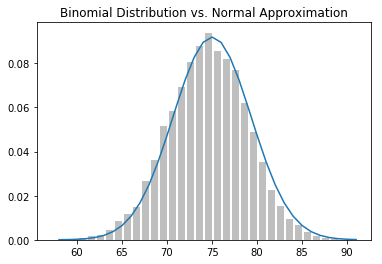

In [11]:
# 6.7

# ニ項確率変数
# 確率pで1、確率（1-p）で0となるn個の独立した確率変数Bernoulli(p)を合計したものがBinomial(n,p)確率変数

import random
from collections import Counter

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p,n,num_points):
    
    data = [binomial(n,p) for _ in range(num_points)]
    
    # ニ項分布を棒グラフでプロットする
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # 正規分布の近似を折れ線グラフでプロットする
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
make_hist(0.75, 100, 10000)